In [2]:
import requests
URL = "https://www.airlinequality.com/#google_vignette"
r = requests.get(URL)
print(r.content)

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>Airline Reviews and Rating | SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequality.co

In [4]:
from bs4 import BeautifulSoup
import requests

# Fetch the web page
url = "https://example.com"
response = requests.get(url)
data = response.text

# Parse the HTML content
soup = BeautifulSoup(data, 'html.parser')

# Extract specific elements
titles = soup.find_all('h1')
for title in titles:
    print(title.text)

Example Domain


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [10]:
df.to_csv("BA_reviews.csv")

In [11]:
df.head()


,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [12]:
import pandas as pd

new=df["reviews"].str.split("|", n=1, expand=True)
df["verified"]= new[0]
df["reviews"]=new[1]

In [13]:
print("Maximum Length of Reviews :", df["reviews"].str.len().max())
print("Minimum  Length of Reviews :", df["reviews"].str.len().min())
print("Average  Length of Reviews :", df["reviews"].str.len().mean())

Maximum Length of Reviews : 3491.0
Minimum  Length of Reviews : 131.0
Average  Length of Reviews : 845.288859239493


C:\Users\shraw\AppData\Local\Temp\ipykernel_24592\1529521642.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["reviews"].str.len(), color="#00BFA0", label="Reviews", hist=False, kde_kws={"shade": True}, axlabel="Review Length")
c:\Users\shraw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


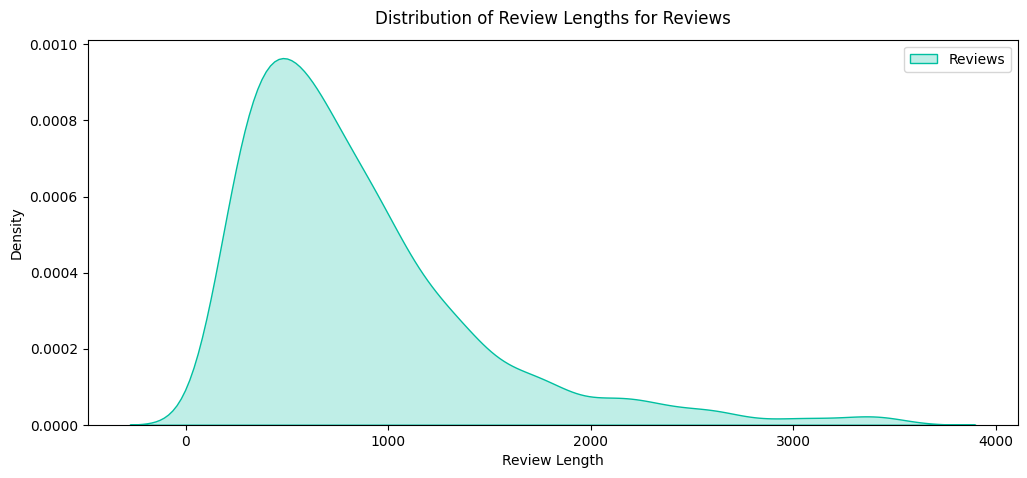

In [14]:
#   Plotting a distribution plot of the review lengths for the reviews.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.distplot(df["reviews"].str.len(), color="#00BFA0", label="Reviews", hist=False, kde_kws={"shade": True}, axlabel="Review Length")
plt.title("Distribution of Review Lengths for Reviews", y=1.02)
plt.legend(loc="upper right")
plt.show()

c:\Users\shraw\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shraw\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10062 (\N{NEGATIVE SQUARED CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


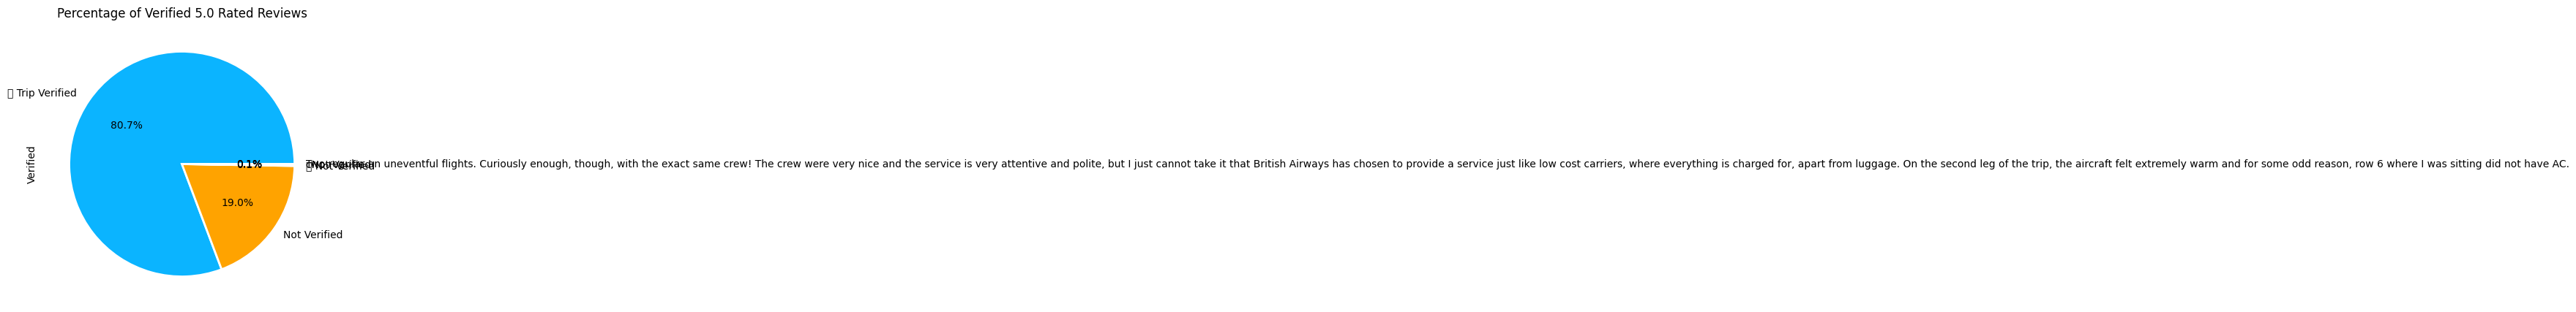

In [15]:
verification_status=df["verified"].value_counts() 
verification_status.plot.pie(autopct="%1.1f%%", figsize=(5, 5), colors=["#0BB4FF", "#FFA300"], title="Percentage of Verified 5.0 Rated Reviews", fontsize=10, wedgeprops={"linewidth": 2, "edgecolor": "white"})
plt.ylabel("Verified")
plt.show()


In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
words = ''
stopwords =set(STOPWORDS)
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shraw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
#df["preprocess_text"]=' '
for review in df.reviews:
    token=str(review).split()
    token = [i.lower() for i in token]

    words += ' '.join(token)+ ' '
   
print(type(words))

df.head()


<class 'str'>


,reviews,verified,preprocess_text
0,On a recent flight from Cyprus BA621 on 23/...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...
2,This was the first time I flew British Airw...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...
3,Pretty good flight but still some small thi...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...
4,"Check in was fine, but no priority/fast track...",✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...


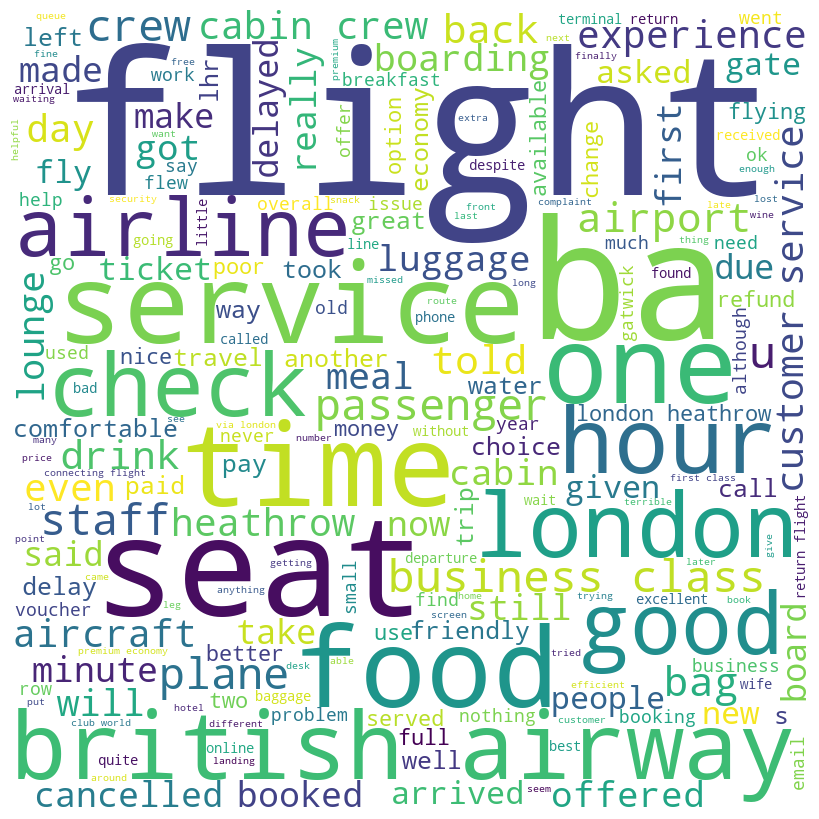

In [20]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



In [63]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
print(stopwords.words('english'))
stopwords = stopwords.words('english')

def text_prep(x):
     corp = str(x).lower() 

     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stopwords]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

preprocess_tag = [text_prep(i) for i in df['reviews']]
df["preprocess_txt"] = preprocess_tag

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shraw\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shraw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

In [67]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [68]:
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

In [70]:
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)
df.head()

,reviews,verified,preprocess_text,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,On a recent flight from Cyprus BA621 on 23/...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...,"[recent, flight, cyprus, ba, second, cabin, do...",129,5,5,0.00
1,Flight BA 0560 arrived in Rome on 11 Decemb...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...,"[flight, ba, arrived, rome, december, passenge...",107,1,3,-0.02
2,This was the first time I flew British Airw...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...,"[first, time, flew, british, airway, huge, dis...",104,1,3,-0.02
3,Pretty good flight but still some small thi...,✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...,"[pretty, good, flight, still, small, thing, im...",170,28,9,0.11
4,"Check in was fine, but no priority/fast track...",✅ Trip Verified,on a recent flight from cyprus ba621 on 23/11/...,"[check, fine, priority, fast, track, line, sec...",100,9,6,0.03


In [79]:
neg = sum(n<0 for n in df["sentiment"])
print(neg/1500 *100, '%')
pos = sum (n>0 for n in df["sentiment"])
print(pos/1500 * 100, '%')
neu= sum(n==0 for n in df["sentiment"])
print (neu/1500 * 100, '%')

df.shape[0]

45.0 %
47.199999999999996 %
7.8 %


1500